In [8]:
import cv2
import numpy as np
from PIL import Image, ImageSequence

# Load the multi-frame TIFF (Z-stack)
input_path = "/Users/gronea/Box/Fuse My Cells Challenge/image_169-180/image_176_membrane_angle.tif"  # Change this to your file
output_path = "zstack_denoised.tif"

# Open the image using PIL
with Image.open(input_path) as img:
    frames = []
    
    for i, frame in enumerate(ImageSequence.Iterator(img)):
        # Convert frame to numpy array (grayscale or color)
        image = np.array(frame)

        # Ensure image is in float32 for processing (if not already)
        if image.dtype != np.float32:
            image = image.astype(np.float32)  # Keep as float32 without normalizing
        
        # Normalize the image to reduce intensity before filtering
        image_min = np.min(image)
        image_max = np.max(image)
        image = (image - image_min) / (image_max - image_min)  # Normalize to [0, 1]

        # Dynamically determine parameters
        height, width = image.shape[:2]
        d = max(5, min(height, width) // 50)  # Adaptive diameter
        
        # Adjust sigmaColor to control smoothing intensity
        sigmaColor = np.std(image) * 0.15  # Reduce from 0.75 to 0.1.5 for less intense smoothing
        sigmaSpace = d * 1              # Linked to d

        # Apply bilateral filtering (image in float32)
        denoised_image = cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

        # Denormalize back to the original intensity range [image_min, image_max]
        denoised_image = denoised_image * (image_max - image_min) + image_min

        # Clip to ensure no values are out of range
        denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

        # Convert back to PIL Image and append the frame
        frames.append(Image.fromarray(denoised_image))

        #print(f"Processed frame {i+1} with d={d}, sigmaColor={sigmaColor:.2f}, sigmaSpace={sigmaSpace:.2f}")

    # Save as a multi-frame TIFF (without any clipping)
    frames[0].save(output_path, save_all=True, append_images=frames[1:], compression="tiff_deflate")
print(f"Denoised Z-stack saved as {output_path}")


Denoised Z-stack saved as zstack_denoised.tif


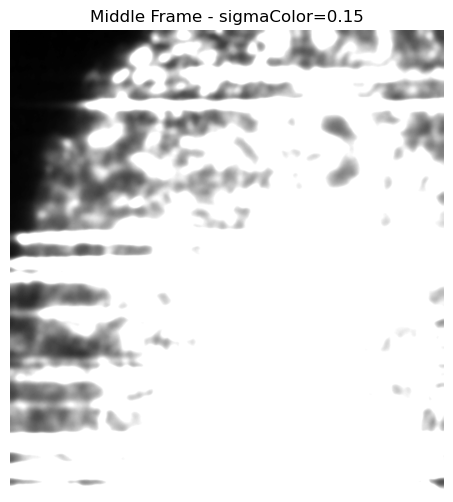

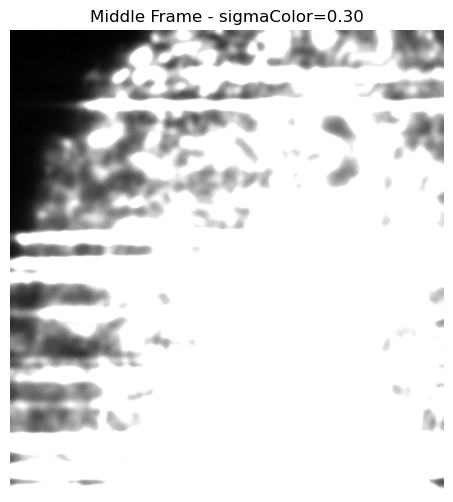

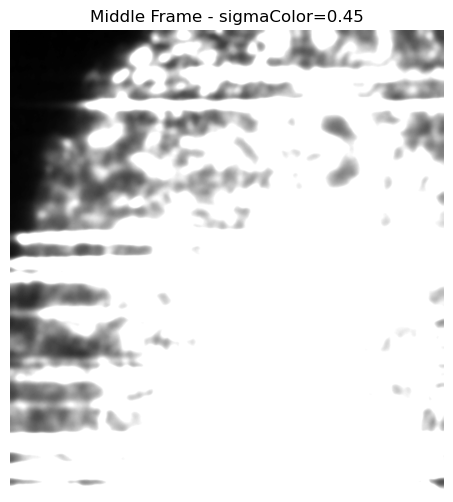

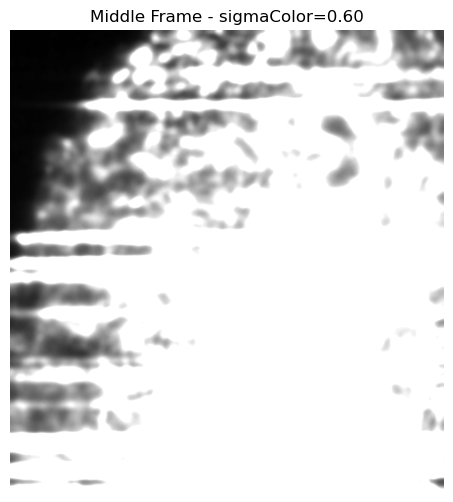

Displayed middle frame with different sigmaColor values.


In [10]:
import cv2
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

# Load the multi-frame TIFF (Z-stack)
input_path = "/Users/gronea/Box/Fuse My Cells Challenge/image_169-180/image_176_membrane_angle.tif"  # Change this to your file

# Open the image using PIL
with Image.open(input_path) as img:
    frames = []
    num_frames = len(list(ImageSequence.Iterator(img)))
    middle_frame_idx = num_frames // 2  # Get the index of the middle frame
    
    for i, frame in enumerate(ImageSequence.Iterator(img)):
        # Convert frame to numpy array (grayscale or color)
        image = np.array(frame)

        # Ensure image is in float32 for processing (if not already)
        if image.dtype != np.float32:
            image = image.astype(np.float32)  # Keep as float32 without normalizing
        
        # Normalize the image to reduce intensity before filtering
        image_min = np.min(image)
        image_max = np.max(image)
        image = (image - image_min) / (image_max - image_min)  # Normalize to [0, 1]

        # Dynamically determine parameters
        height, width = image.shape[:2]
        d = max(5, min(height, width) // 50)  # Adaptive diameter
        
        # Try different sigmaColor values to observe changes
        sigmaColor_values = [0.15, 0.30, 0.45, 0.60]
        for sigmaColor in sigmaColor_values:
            sigmaSpace = d * 1  # Linked to d

            # Apply bilateral filtering (image in float32)
            denoised_image = cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

            # Denormalize back to the original intensity range [image_min, image_max]
            denoised_image = denoised_image * (image_max - image_min) + image_min

            # Clip to ensure no values are out of range
            denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

            # Plot the middle frame with different settings
            if i == middle_frame_idx:
                plt.figure(figsize=(10, 6))
                plt.imshow(denoised_image, cmap='gray')
                plt.title(f"Middle Frame - sigmaColor={sigmaColor:.2f}")
                plt.axis('off')
                plt.show()

        frames.append(denoised_image)  # Append processed frame (not saving, just visualizing)

print("Displayed middle frame with different sigmaColor values.")

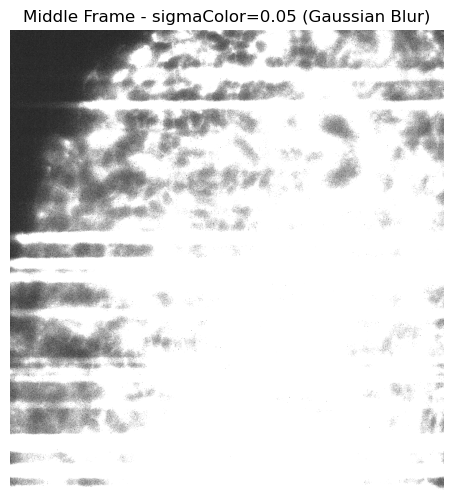

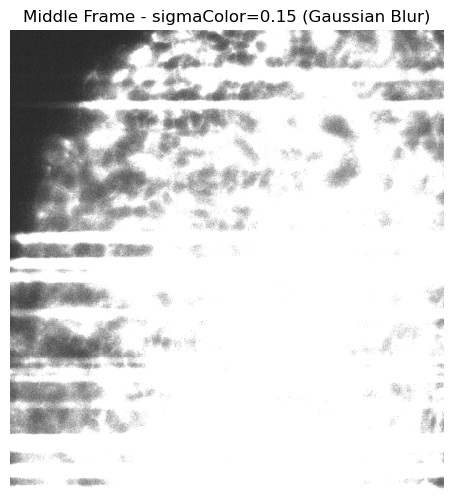

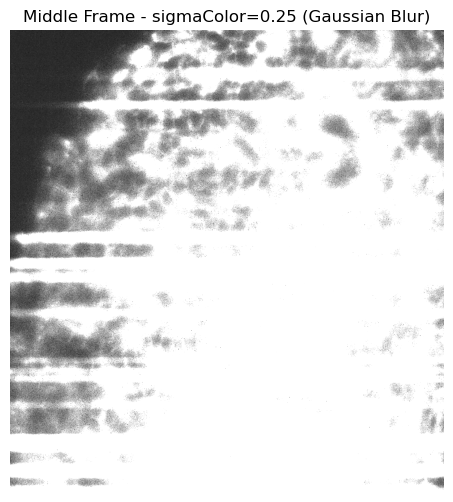

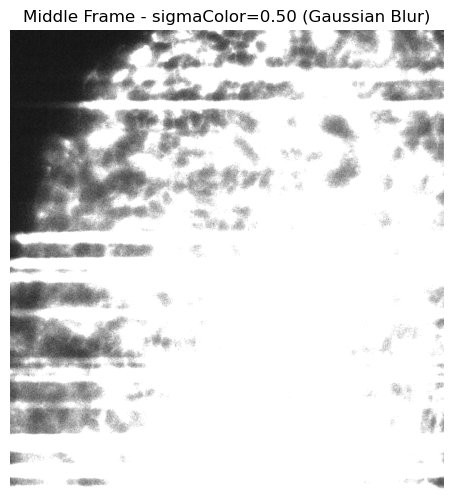

Displayed middle frame with different sigmaColor values.


In [12]:
import cv2
import numpy as np
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt

# Load the multi-frame TIFF (Z-stack)
input_path = "/Users/gronea/Box/Fuse My Cells Challenge/image_169-180/image_176_membrane_angle.tif"  # Change this to your file

# Open the image using PIL
with Image.open(input_path) as img:
    frames = []
    num_frames = len(list(ImageSequence.Iterator(img)))
    middle_frame_idx = num_frames // 2  # Get the index of the middle frame
    
    for i, frame in enumerate(ImageSequence.Iterator(img)):
        # Convert frame to numpy array (grayscale or color)
        image = np.array(frame)

        # Ensure image is in float32 for processing (if not already)
        if image.dtype != np.float32:
            image = image.astype(np.float32)  # Keep as float32 without normalizing
        
        # Normalize the image to reduce intensity before filtering
        image_min = np.min(image)
        image_max = np.max(image)
        image = (image - image_min) / (image_max - image_min)  # Normalize to [0, 1]

        # Dynamically determine parameters
        height, width = image.shape[:2]
        d = max(5, min(height, width) // 50)  # Adaptive diameter
        
        # Adjust sigmaColor to control smoothing intensity (let’s test a more varied range)
        sigmaColor_values = [0.05, 0.15, 0.25, 0.5]  # Trying lower values for sigmaColor
        for sigmaColor in sigmaColor_values:
            sigmaSpace = d * 1  # Linked to d

            # Apply Gaussian blur for comparison (if bilateral is still not giving desired results)
            denoised_image = cv2.GaussianBlur(image, (d*2+1, d*2+1), sigmaX=sigmaColor)

            # Denormalize back to the original intensity range [image_min, image_max]
            denoised_image = denoised_image * (image_max - image_min) + image_min

            # Clip to ensure no values are out of range
            denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

            # Plot the middle frame with different settings
            if i == middle_frame_idx:
                plt.figure(figsize=(10, 6))
                plt.imshow(denoised_image, cmap='gray')
                plt.title(f"Middle Frame - sigmaColor={sigmaColor:.2f} (Gaussian Blur)")
                plt.axis('off')
                plt.show()

        frames.append(denoised_image)  # Append processed frame (not saving, just visualizing)

print("Displayed middle frame with different sigmaColor values.")